# Machine Learning 26: Decission Tree(Regression)

### 1. **What is Decision Tree Regression ?**

**Decision Tree Regression** is a type of supervised machine learning algorithm used for predicting continuous values (i.e., regression tasks). It splits the dataset into subsets using a tree-like structure based on feature values, aiming to predict the target (numerical) variable.

#### 2. **Structure:**

* The tree consists of:

  * **Root Node** – the first split.
  * **Internal Nodes** – decision points based on feature values.
  * **Leaf Nodes** – final output values (predictions).

#### 3. **How it works:**

* At each node, the algorithm finds the best feature and threshold to split the data such that the target variable's variance is minimized in the resulting groups.
* This is done recursively until:

  * A stopping condition is met (e.g., max depth, min samples).
  * Or the variance in the node is minimal.

#### 4. **Splitting Criteria (for Regression):**

* **Mean Squared Error (MSE)** is commonly used:

  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$

  * Where $y_i$ is actual value, $\bar{y}$ is mean prediction in a node.
  * The goal is to minimize the **sum of MSEs** of all child nodes.

#### 5. **Prediction:**

* Once trained, for any new data point, the model traverses the tree according to feature values and reaches a leaf node.
* The **average** of target values in that leaf is the predicted output.

#### 6.1 **Advantages:**

* Easy to understand and interpret.
* Handles both numerical and categorical data.
* No need for feature scaling or normalization.
* Can model non-linear relationships.

#### 6.2 **Disadvantages:**

* Prone to **overfitting** if not pruned or regularized.
* Sensitive to small variations in data (high variance).
* Not as accurate as ensemble methods (like Random Forests).

#### 7. **Common Hyperparameters:**

* `max_depth` – Maximum depth of the tree.
* `min_samples_split` – Minimum samples required to split a node.
* `min_samples_leaf` – Minimum samples at a leaf node.
* `max_leaf_nodes` – Maximum number of leaf nodes.


# 1. Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [2]:
dataset =pd.read_csv("salary.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
# dataset = dataset.drop(["Job Title", "Gender" , "Education Level"], axis=1)

In [5]:
# Drop rows with missing values
# dataset = dataset.dropna()

In [6]:
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [8]:
# dataset["Job Title"].value_counts()

In [9]:
dataset.shape

(20, 3)

In [10]:
dataset.isnull().sum().sort_values(ascending=False)

age           0
experience    0
income        0
dtype: int64

# 3. Feature Selection

In [11]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

# 4. Split into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Create the Decision Tree Regressor model

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
regressor = DecisionTreeRegressor(criterion='squared_error',splitter='best', random_state = 0)
# regressor.fit(X, y)

regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# 6. Make predictions

In [16]:
y_pred = regressor.predict(X_test)

# 7.Evaluate the model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 7681059.25925926
R2: 0.5988149301086649


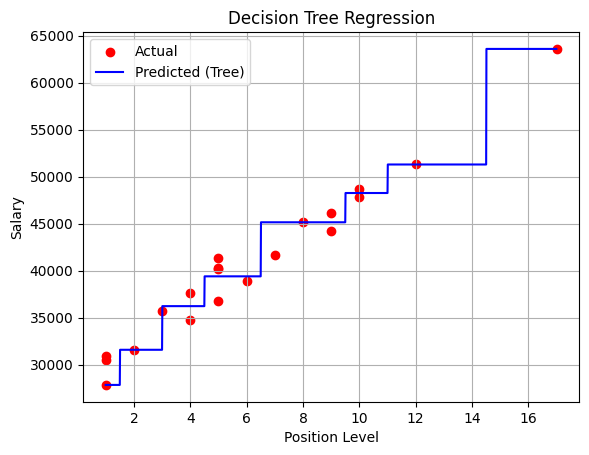

In [19]:
# Visualize
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red', label="Actual")
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label="Predicted (Tree)")
plt.title("Decision Tree Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()